#Single Perceptron
##PY5999 (Fall 2018): Applied Artificial Intelligence
##NC State University
###Dr. Behnam Kia

Codes by Mansi Sakarvadia

In [0]:
import numpy as np
from numpy.random import seed
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import rcParams
import random
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

import math

#Data

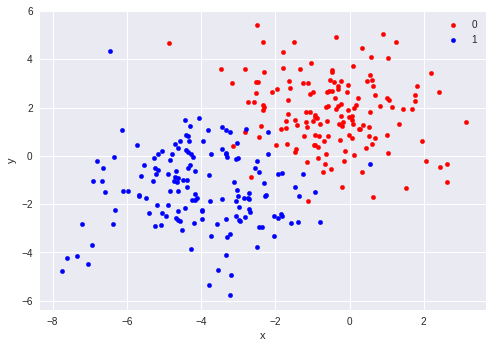

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
Data_set_size=200
X, Y = make_blobs(n_samples=300, centers=2, n_features=2,cluster_std=1.5, center_box=(-4.0, 4.0),random_state=1)
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
#print(df)
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

#Perceptron

In [0]:
def perceptron(x1, x2, w1, w2, b):
  z = x1*w1+x2*w2+b
  sig = 1 / (1+math.exp(-z)+ 0.0000000001) #we add this tiny float to ensure that the value never goes to zero which is undefined
  return sig

#Cost Function

In [0]:
def randrange_float(start, stop, step):
    return random.randint(0, int((stop - start) / step)) * step + start
  
def cost(x, y):
  w1 = x
  b = y
  errorSum = 0
  for i in range(len(df)):
    x = df.iloc[i,1]
    y = df.iloc[i,2]
    h = df.iloc[i,0]
    if(h==0):                   ##For some reason I had to make this h==0; usually it s h==1
      errorSum += -math.log(np.abs(perceptron(x,y,w1,1,b)))
    else:
      errorSum += -math.log(np.abs(1 - perceptron(x,y,w1,1,b)))
  errorSum = errorSum* 1/len(df)
  return(errorSum)


#Random Optimizer

('The lowest error is when w1 =', 1.78, 'and when b=', 3.74)
('lowest error:', 0.10276540316842182)


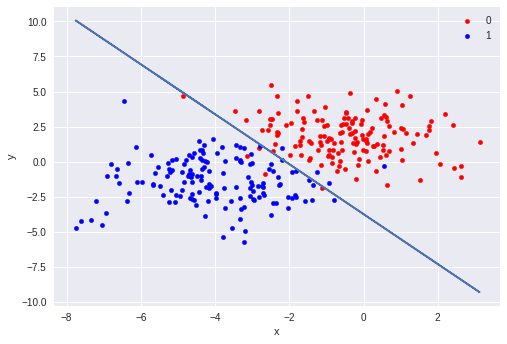

In [0]:
niter = 500 #number of iterations run

  
def randOpt(niter, f):
  global w1
  global b, bestb, bestw1
  smallestValue = 2000 # initialize a random small value
  for i in range(niter):
    w1, b = randrange_float(0,3, 0.01), randrange_float(0,6, 0.01)  #picks random values within the desired range and domain of the function to test as the min
    value = f(w1,b)
 #  print(value)    #optional step to see randomly evaluated values of the function
    if value < smallestValue:
      smallestValue = value
      bestb = b
      bestw1 = w1
  print("The lowest error is when w1 =", bestw1, "and when b=", bestb)
  
  return smallestValue
      
print("lowest error:",randOpt(niter, cost))

xval = X[:,0]

ycoord = -xval*bestw1 - bestb

colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.plot(xval, ycoord)
pyplot.show()

#Batch Gradient Descent Optimizer

('Best w1: ', 1.7932362061323466, 'Best b:', 3.793236206132345)
('Best Error:', 0.102948940940252)


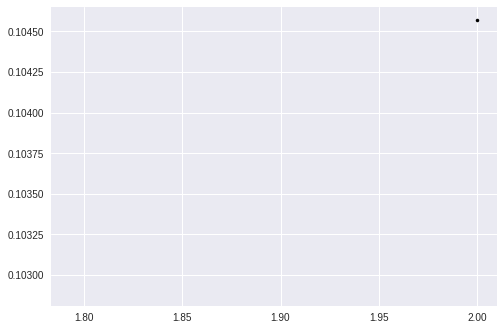

In [0]:
alpha = 0.01  #step size (learning rate in context of machine learning)
n_iterations = 200
precision=0.001
step_size=1
iteration=0
w1 = 2       #based on your random optimizer, set ball park initial parameter values, otherwise ur algorithm is shooting in the dark and might not be optimal
b=4

fig1, ax1 = plt.subplots()

#colors = plt.cm.jet(np.linspace(0,1,n_iterations))

ax1.plot(w1,cost(w1, b),'k.')

while (step_size > precision) & (iteration < n_iterations):
    new_w1=w1-alpha*cost(w1,b)
    new_b=b-alpha*cost(w1,b)             #ARNT YOU SUPPOSED TO UPDATE THESE AT THE SAME TIME?? B AND W1? HOW DO U DO THAT
    step_size = abs(new_w1 - w1)
    w1=new_w1
    b = new_b
    plt.plot(w1,cost(w1,b))
    iteration=iteration+1
print("Best w1: ", w1,"Best b:", b) 
print("Best Error:", cost(w1, b))

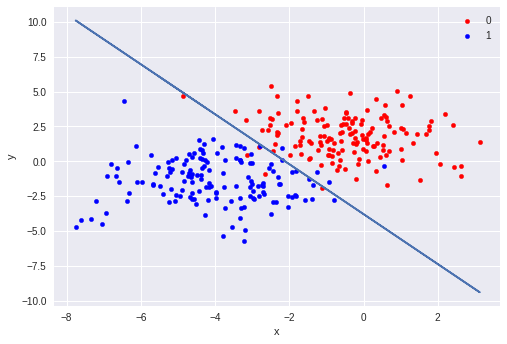

In [0]:
xval = X[:,0]

ycoord = -xval*w1 - b

colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.plot(xval, ycoord)
pyplot.show()

#Stochastic Gradient Descent Optimizer

('Best w1: ', 1.90009394075615, 'Best b:', 3.900093940756149)
0.000268711453465


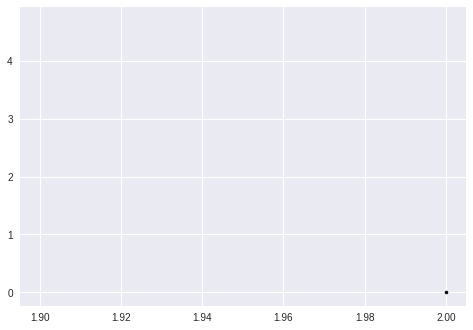

In [0]:
#https://www.pyimagesearch.com/2016/10/17/stochastic-gradient-descent-sgd-with-python/ # READ THIS
  #might need to modify cost function to take in data; this way you can control whether u pass entire data set for Batch, 1 instance for SGD, or a few for mini-batch
n_epochs = 50

alpha = 0.01  #step size (learning rate in context of machine learning)
n_iterations = 200
precision=0.001
step_size=1
iteration=0
w1 = 2       #based on your random optimizer, set ball park initial parameter values, otherwise ur algorithm is shooting in the dark and might not be optimal
b=4
error = 0

fig1, ax1 = plt.subplots()

#colors = plt.cm.jet(np.linspace(0,1,n_iterations))

  

ax1.plot(w1,error,'k.')

for epoch in range(n_epochs):
  #for i in range(300): # this is how u itterate thru mini batches
    random_index = np.random.randint(300)
    error = 0
    x = df.iloc[random_index,1]
    y = df.iloc[random_index,2]
    h = df.iloc[random_index,0]
    if(h==0):                   ##For some reason I had to make this h==0; usually it s h==1
      error += -math.log(np.abs(perceptron(x,y,w1,1,b)))
    else:
      error += -math.log(np.abs(1 - perceptron(x,y,w1,1,b)+0.0000000001))  #we add this tiny float to ensure that the value never goes to zero which is undefined
    new_w1=w1-alpha*error
    new_b=b-alpha*error           #ARNT YOU SUPPOSED TO UPDATE THESE AT THE SAME TIME?? B AND W1? HOW DO U DO THAT
    step_size = np.abs(new_w1 - w1)
    w1=new_w1
    b = new_b
    plt.plot(w1,error)
print("Best w1: ", w1,"Best b:", b)
print(error) # interpret what error means in context; cus this is not the same measure of error as above

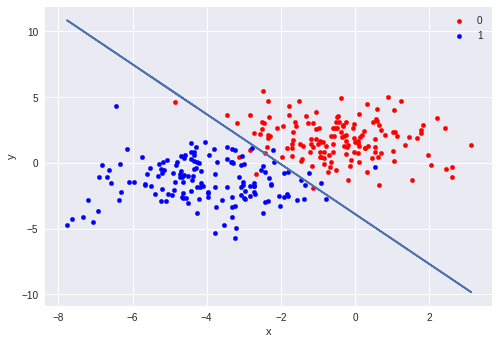

In [0]:
xval = X[:,0]

ycoord = -xval*w1 - b

colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.plot(xval, ycoord)
pyplot.show()

#Mini-batch Gradient Descent Optimizer

('Best w1: ', 1.9079573713710014, 'Best b:', 3.907957371371002)
0.37241483796


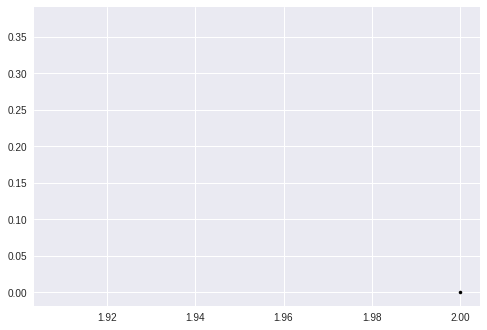

In [0]:
#https://www.pyimagesearch.com/2016/10/17/stochastic-gradient-descent-sgd-with-python/ # READ THIS
  #might need to modify cost function to take in data; this way you can control whether u pass entire data set for Batch, 1 instance for SGD, or a few for mini-batch
n_epochs = 40

alpha = 0.01  #step size (learning rate in context of machine learning)
n_iterations = 200
precision=0.001
step_size=1
iteration=0
w1 = 2       #based on your random optimizer, set ball park initial parameter values, otherwise ur algorithm is shooting in the dark and might not be optimal
b=4
error = 0

fig1, ax1 = plt.subplots()

#colors = plt.cm.jet(np.linspace(0,1,n_iterations))


batch_size = 5

ax1.plot(w1,error,'k.')

for epoch in range(n_epochs):
  errorSum = 0
  for i in range(batch_size): # this is how u itterate thru mini batches
    random_index = np.random.randint(300)
    x = df.iloc[random_index,1]
    y = df.iloc[random_index,2]
    h = df.iloc[random_index,0]
    if(h==0):                   ##For some reason I had to make this h==0; usually it s h==1
      errorSum += -math.log(np.abs(perceptron(x,y,w1,1,b)))
    else:
      errorSum += -math.log(np.abs(1 - perceptron(x,y,w1,1,b)+0.0000000001))  #we add this tiny float to ensure that the value never goes to zero which is undefined
    new_w1=w1-alpha*(errorSum/batch_size)
    new_b=b-alpha*(errorSum/batch_size)           #ARNT YOU SUPPOSED TO UPDATE THESE AT THE SAME TIME?? B AND W1? HOW DO U DO THAT
    step_size = np.abs(new_w1 - w1)
    w1=new_w1
    b = new_b
    plt.plot(w1,(errorSum/batch_size))
print("Best w1: ", w1,"Best b:", b)
print((errorSum/batch_size)) # interpret what error means in context; cus this is not the same measure of error as above

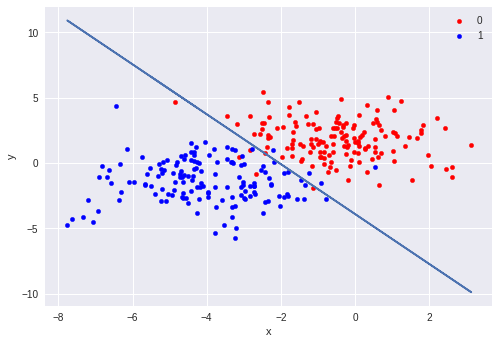

In [0]:
xval = X[:,0]

ycoord = -xval*w1 - b

colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.plot(xval, ycoord)
pyplot.show()